In [73]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [32]:
sdss = Table.read('sdss_m2_period.txt', format='ascii')

In [33]:
sdss

ID,IAU NAME,M2,porb,M2e,porbe
int64,str24,float64,float64,float64,float64
64,SDSSJ005245.11-005337.2,0.319,2.735,0.09,0.002
81,SDSSJ011009.09+132616.1,0.319,7.984495,0.09,3e-06
117,SDSSJ013851.54-001621.6,0.255,1.746529272,0.124,1e-09
127,SDSSJ015225.38-005808.5,0.196,2.1519468,0.085,9.9e-06
170,SDSSJ022503.02+005456.2,0.294,21.86,0.09,0.16
182,SDSSJ023804.39-000545.7,0.38,5.0801,0.072,0.0048
189,SDSSJ024642.55+004137.2,0.38,17.43,0.072,0.04
217,SDSSJ030308.35+005444.1,0.287,3.226505,0.107,1e-06
229,SDSSJ031404.98-011136.6,0.319,6.32,0.09,0.02


<ErrorbarContainer object of 3 artists>

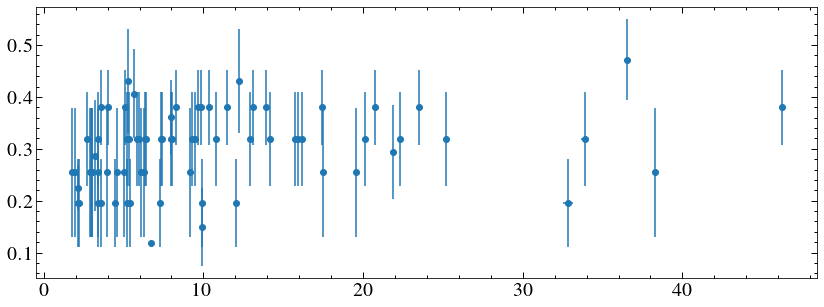

In [155]:
plt.errorbar(sdss['porb'], sdss['M2'], xerr=sdss['porbe'], yerr=sdss['M2e'], marker='o', ls='none')
#plt.errorbar()

In [229]:
period = 4.226953752501198
pe = 0.2
m2 = 0.08224821973550357
m2e = 0.009135699983472514

(0, 30)

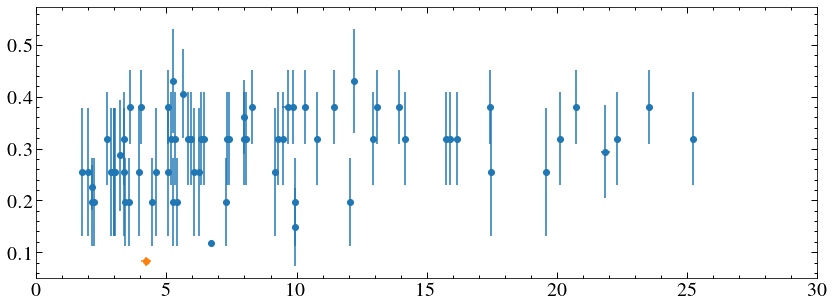

In [230]:
plt.errorbar(sdss['porb'], sdss['M2'], xerr=sdss['porbe'], yerr=sdss['M2e'], marker='o', ls='none')
plt.errorbar(period, m2, xerr=pe, yerr=m2e, marker='o', ls='none')
plt.xlim(0, 30)

Photometry- make a nice plot

<ErrorbarContainer object of 3 artists>

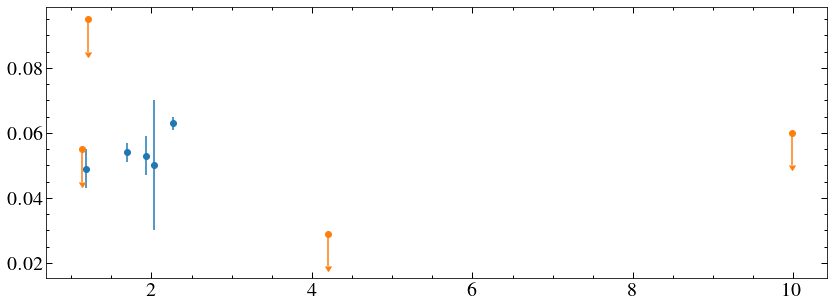

In [235]:
#brown dwarfs
bdp = np.array([9.98,1.93,4.2,1.698,2.27,1.187,1.2083,1.13,2.02883])
bdm = np.array([0.06,0.053,0.029,0.054,0.063,0.049,0.095,0.055,0.05])
bde = np.array([-1,0.006,-1,0.00286378269,0.002,0.006,-1,-1,0.02])

mask = (bde > 0)
plt.errorbar(bdp[mask], bdm[mask], yerr=bde[mask], ls='none', marker='o')
plt.errorbar(bdp[~mask], bdm[~mask], yerr=0.01, ls='none', marker='o', uplims=True)

In [37]:
phot_files = glob.glob('ultracam/*.dat')
phot_files

['ultracam/1144_g.dat', 'ultracam/1144_i.dat', 'ultracam/1144_u.dat']

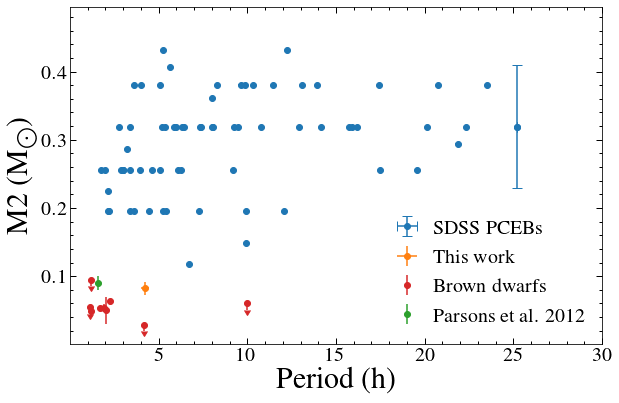

In [273]:
plt.figure(figsize=(9,6))
plt.errorbar(sdss['porb'], sdss['M2'], xerr=sdss['porbe'], marker='o', ls='none', c='C0')
#plt.errorbar(sdss['porb'], sdss['M2'], xerr=sdss['porbe'], yerr=sdss['M2e'], marker='o', ls='none', c='C1')
eg= 31
plt.errorbar(sdss['porb'][eg], sdss['M2'][eg], xerr=sdss['porbe'][eg], yerr=sdss['M2e'][eg], marker='o', ls='none',c='C0',  label='SDSS PCEBs', capsize=5)

plt.errorbar(period, m2, xerr=pe, yerr=m2e, marker='o', ls='none', c='C1', label='This work')
plt.errorbar(bdp[mask], bdm[mask], yerr=bde[mask], ls='none', marker='o', c='C3', label='Brown dwarfs')
plt.errorbar(bdp[~mask], bdm[~mask], yerr=0.01, ls='none', marker='o', uplims=True, c='C3')
spm2 = 0.09
spp = 94/60
spe = 0.01
plt.errorbar(spp, spm2, yerr=spe, marker='o', ls='none', c='C2',label='Parsons et al. 2012')
plt.xlim(0.001, 30)
plt.ylim(0.001)
plt.legend()
plt.xlabel('Period (h)', size=30)
plt.ylabel(r'M2 (M$_{\bigodot}$)', size=30)
plt.tight_layout()
plt.savefig('period_v_mass.png', dpi=150)

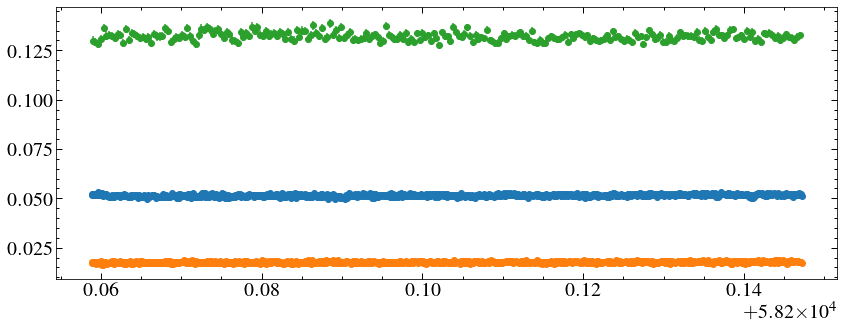

In [40]:
for pht in phot_files:
    t, f, e = np.loadtxt(pht, unpack=True)
    plt.errorbar(t, f, yerr=e,marker='o')

In [44]:
from  craftroom import resample

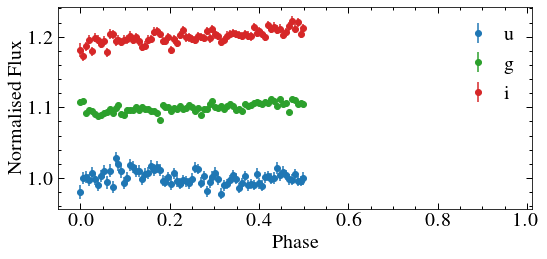

In [78]:
phot_files = ['ultracam/1144_u.dat', 'ultracam/1144_g.dat', 'ultracam/1144_i.dat']


labels = [ 'u','g', 'i']
colors = ['C0','C2', 'C3']

plt.figure(figsize=(8, 4))
for i, pht in enumerate(phot_files):
    t, f, e = np.loadtxt(pht, unpack=True)
    nf, ne = f/np.median(f), e/np.median(f)
    nt = (t-t[0]) *24
    nt , nf, ne = resample.bintogrid(nt, nf, ne, dx=100/3600)
    #nf = convolve(nf,Box1DKernel(smooth))
    #ne = convolve(ne,Box1DKernel(smooth))/smooth**0.5
    plt.errorbar(nt/period, nf+i*0.1, yerr=ne,marker='o', ls='none', label=labels[i], c=colors[i])
    plt.legend()
    plt.xlabel('Phase')
    plt.ylabel('Normalised Flux')
    plt.xlim(-0.05, 1.01)
    plt.tight_layout()
    plt.savefig('1144_phot.png', dpi=150)

NIR? Has it's own notebook. Inclination

In [221]:
m1 = 0.49*const.M_sun
m2 = 0.08*const.M_sun
ph = period*u.hour
ps = ph.to(u.s)
v1 = 33*u.km/u.s
v2 = 196.6*u.km/u.s
G = const.G

In [222]:
#a = ((((const.G*0.5*u.Msun*(4.2*u.hour)**2)/(4*np.pi)**2))**(1/3)).to(u.Rsun)
a = ((G*(m1+m2)*(ps**2))/(4*np.pi**2))**(1/3)
print(a.to(u.Rsun))
vsini = ((G*(m1))/a)**0.5
print(vsini)
#vsini = ((((2*np.pi)**(2/3))*G*(m1))/((G*(ps**2)*(m1+m2))**(1/3)))**0.5
#print(vsini)

1.0963273425627247 solRad
291993.19658159156 m / s


In [223]:
sini = v2.to(u.m/u.s)/vsini
sini

<Quantity 0.67330336>

In [216]:
np.arcsin(sini).to(u.deg)

<Quantity 42.32253446 deg>

In [219]:
vsini2 = ((G*(m1+m2))/a)**0.5
sini2 = v1.to(u.m/u.s)/vsini2
print(sini2)
np.arcsin(sini2).to(u.deg)

0.10478565187957344


<Quantity 6.01481719 deg>

Can I make some relativly calibrated spectra? - scale the blue to the wd model?

In [161]:
path = '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/' #note the / on the end

uvbpath = path + 'UVB/'
usp = glob.glob(uvbpath+'*.csv')
merge = glob.glob(uvbpath+'*merged.csv')[0]
usp.remove(merge)
print(len(usp))

vispath = path + 'VIS_notell/'
vsp = glob.glob(vispath+'*TAC.csv')
#merge = glob.glob(vispath+'*merged.csv')[0]
#sp.remove(merge)
print(len(vsp))

nirpath = path + 'NIR/'
nsp = glob.glob(nirpath+'*.csv')
merge = glob.glob(nirpath+'*merged.csv')[0]
nsp.remove(merge)
print(len(nsp))

33
33
29


In [162]:
usp[0], vsp[0], nsp[0]

('/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/UVB/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_UVB_9.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_30_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/NIR/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_NIR_23.csv')

In [164]:
usp[0][-6:-3]

'_9.'

In [ ]:
## for uvb in usp:
    print(uvb)
    num = uvb[-6:-3]
    vis = glob.glob(vispath+'*'+num+'*')[0]
    print(vis)

Orbital slowdown/time to CV

In [196]:
## ritter 1986
def cv_period(R2, M2):
    psd = (9*np.pi)*(R2.to(u.m)**3/(2*const.G*M2.to(u.kg)))**0.5
    print(psd.to(u.min))
    return psd

def t_to_cv(M1, M2, R2, P, f_vz=1.0, rg2=0.1):
    q = M1/M2
    Psd = cv_period(R2, M2)
    tsd = 1.6e7*u.yr*f_vz**2*((rg2**2/0.1)**-1)*(q/((1+q)**(1/3)))*(R2/(1*u.Rsun))*(1*u.Msun/M2)*(((P/Psd)**(10/3))-1)
    return tsd

In [199]:
#parsons+12 star target = 3.7e8 yr
m1 = 0.51*u.Msun
m2 = 0.09*u.Msun
r2 = 0.11*u.Rsun
p = 94*u.min
t_to_cv(m1, m2, r2, p, f_vz=0.5)

64.54626177306562 min


<Quantity 3.68138465e+08 yr>

In [220]:
#mine
m1 = 0.49*u.M_sun
m2 = 0.08*u.M_sun
r2 = 0.11*u.Rsun
p = ph
t_to_cv(m1, m2, r2, p, f_vz=0.5)

68.46164909996509 min


<Quantity 1.35963435e+10 yr>

In [227]:
const.M_jup/const.M_sun

<Quantity 0.00095459>

In [262]:
np.array(sdss['porb'])

array([ 2.735     ,  7.984495  ,  1.74652927,  2.1519468 , 21.86      ,
        5.0801    , 17.43      ,  3.226505  ,  6.32      ,  3.3751    ,
       11.45451   , 12.2181648 ,  7.344     ,  6.06866927,  9.491     ,
       46.2270672 ,  6.7313    ,  9.17      ,  3.00389076,  9.273     ,
        3.399     ,  2.98775434,  8.060894  ,  2.161872  ,  5.8493    ,
       22.31916   ,  4.0202376 , 17.48      ,  3.015144  , 20.13369   ,
       36.5426    , 25.22355   , 32.81      ,  9.9317    , 14.151167  ,
       33.87      ,  3.962     ,  4.45242576,  9.936     ,  1.97678   ,
        7.2922    , 38.29      , 19.567     , 16.155     ,  7.992463  ,
        6.4326    , 23.53152   ,  2.2152    ,  9.855     , 10.7754    ,
        3.5835    ,  5.3336    , 12.07015   ,  5.0487    ,  6.2541    ,
       15.74      ,  5.26331882,  5.19173117,  4.60296648,  5.237716  ,
       12.93874   , 10.3266    ,  3.6091    ,  3.36861775,  5.64061829,
        8.274     ,  7.391     ,  9.66      ,  5.962     , 13.08